In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://github.com/Kofoworola13/DSS/raw/refs/heads/main/datasets/BA_reviews.csv")

In [ ]:
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | British Airways World Trav...
1,1,✅ Trip Verified | BA is barely a step above ...
2,2,Not Verified | Happy with the flight crew. Ha...
3,3,✅ Trip Verified | Horrible service from boar...
4,4,Not Verified | My wife and I are very disappo...


In [ ]:
df.shape

(3865, 2)

# Data Cleaning


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
# Filtering the rows where the trip is Not Verified
df = df[~df['reviews'].str.contains("Not Verified")]

In [ ]:
df.shape

(3582, 1)

In [ ]:
# Striping the "✅ Trip Verified" part

df['reviews'] = df['reviews'].str.strip("✅ Trip Verified |")

In [ ]:
# Converting all the texts to lowercases

df['lowercase'] = df['reviews'].str.lower()

In [ ]:
# Removing punctuations

df['no_puctuations'] = df['lowercase'].str.replace('[^\w\s]','', regex=True)

In [ ]:
# Removing stopwords
from nltk.corpus import stopwords
import nltk # imports the nltk module
nltk.download('stopwords') # downloads the stopwords resource

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')

df['no_stopwords'] = df['no_puctuations'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# Lemmatizing words
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

df['lemmatized'] = df['no_stopwords'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [ ]:
# Review recurring words
from collections import Counter

# Combine all the reviews into one text
all_reviews = ' '.join(df['lemmatized'])

# Split the text into individual words
words = all_reviews.split()

# Count the frequency of each word
word_freq = Counter(words)
word_freq.most_common()

[('flight', 7587),
 ('ba', 4700),
 ('seat', 4385),
 ('service', 2880),
 ('time', 2354),
 ('food', 2304),
 ('crew', 2215),
 ('british', 2099),
 ('london', 2093),
 ('airway', 2086),
 ('cabin', 2046),
 ('good', 2041),
 ('class', 1925),
 ('hour', 1777),
 ('airline', 1697),
 ('one', 1625),
 ('business', 1578),
 ('staff', 1527),
 ('heathrow', 1482),
 ('would', 1426),
 ('economy', 1385),
 ('get', 1314),
 ('passenger', 1302),
 ('first', 1279),
 ('drink', 1167),
 ('plane', 1154),
 ('meal', 1130),
 ('lounge', 1107),
 ('club', 1099),
 ('return', 1081),
 ('u', 1061),
 ('back', 1053),
 ('boarding', 986),
 ('experience', 979),
 ('even', 959),
 ('review', 934),
 ('could', 926),
 ('check', 912),
 ('new', 883),
 ('customer', 881),
 ('bag', 870),
 ('fly', 866),
 ('aircraft', 865),
 ('day', 797),
 ('minute', 787),
 ('like', 770),
 ('told', 756),
 ('really', 703),
 ('well', 701),
 ('better', 700),
 ('airport', 695),
 ('long', 684),
 ('way', 677),
 ('choice', 675),
 ('leg', 671),
 ('comfortable', 671),
 ('

In [ ]:
# Dropping unecessary columns
df = df.drop(columns=['lowercase', 'no_puctuations', 'no_stopwords'])

# Analysis

In [ ]:
# Sentiment analysis
from textblob import TextBlob

In [ ]:
df['polarity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
df['subjectivity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [ ]:
df.describe()

,polarity,subjectivity
count,3582.000000,3582.000000
mean,0.099682,0.478314
std,0.186441,0.115976
min,-1.000000,0.000000
25%,-0.020132,0.411161
50%,0.095995,0.480000
75%,0.217122,0.547222
max,0.800000,1.000000


* **Polarity**: The dataset shows an **overall neutral to slightly positive** sentiment with a moderate spread of negative and positive reviews.

* **Subjectivity**: Most reviews are **moderately balanced between factual and opinion-based content**, with only a few fully subjective or fully objective reviews.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-23-be4781cc8560>:63: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


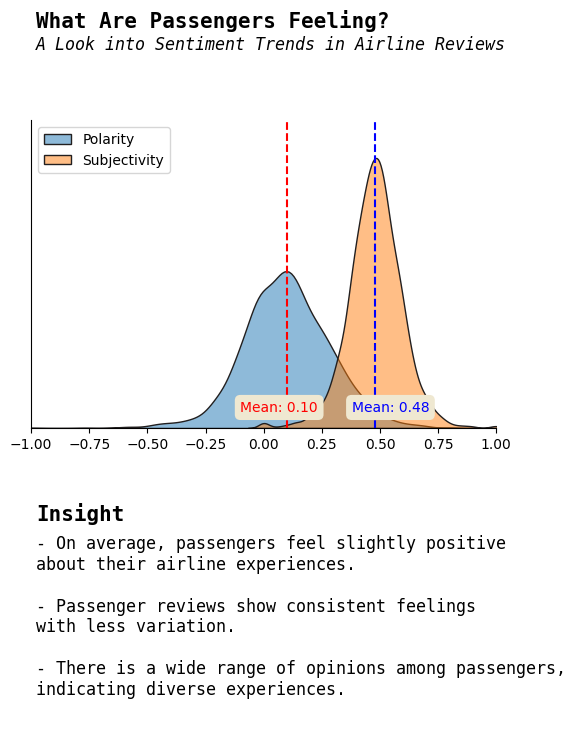

In [ ]:
# Visualizing the Polarity and Subjectivity Distribution

plt.figure(figsize=(6, 4))

# Density plots
sns.kdeplot(df['polarity'], fill=True, alpha=0.5, edgecolor='#221f1f')
sns.kdeplot(df['subjectivity'], fill=True, alpha=0.5, edgecolor='#221f1f')

# Setting x-axis and y-axis limits
plt.xlim(-1, 1)
plt.ylim(0, 4.5)

# Removing y-axis ticks and labels
plt.tick_params(left=False, labelleft=False)

# Removing ticks and spines
plt.tick_params(left=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Remove x and y axis labels
plt.xlabel('')
plt.ylabel('')

# Calculate and plot mean lines
mean_polarity = df['polarity'].mean()
mean_subjectivity = df['subjectivity'].mean()
plt.axvline(x=mean_polarity, color='red', linestyle='--')
plt.axvline(x=mean_subjectivity, color='blue', linestyle='--')

# Annotate mean values with a box
plt.text(mean_polarity - 0.2, 0.3, f'Mean: {mean_polarity:.2f}', color='red', va='center',
         bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0, edgecolor='none'))
plt.text(mean_subjectivity - 0.1, 0.3, f'Mean: {mean_subjectivity:.2f}', color='blue', va='center',
         bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0, edgecolor='none'))

# Adding title and subtitle
plt.text(0.01, 1.3, 'What Are Passengers Feeling?',
         fontsize=15, fontweight='bold', fontfamily='monospace', transform=plt.gca().transAxes)
plt.text(0.01, 1.23, 'A Look into Sentiment Trends in Airline Reviews',
         fontsize=12, fontweight='light', fontfamily='monospace',
         fontdict={'fontstyle': 'italic'}, transform=plt.gca().transAxes)

# Adding legends
plt.legend(['Polarity', 'Subjectivity'])

# Adding texts for insights
plt.text(0.01, -0.3, 'Insight',
         fontsize=15, fontweight='bold', fontfamily='monospace', transform=plt.gca().transAxes)

plt.text(0.01, -1, '''
- On average, passengers feel slightly positive
about their airline experiences.

- Passenger reviews show consistent feelings
with less variation.

- There is a wide range of opinions among passengers,
indicating diverse experiences.

        ''', fontsize=12, fontweight='light', fontfamily='monospace', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [ ]:
# Topic Modeling to uncover themes and topics
from gensim import corpora
from gensim.models import LdaModel

In [ ]:
# Create a dictionary representation of the words
dictionary = corpora.Dictionary(df['lemmatized'].apply(str.split))

# Create a bag-of-words representation of the reviews
bow_corpus = [dictionary.doc2bow(text.split()) for text in df['lemmatized']]

# Train the LDA model
lda_model = LdaModel(bow_corpus, num_topics=6, id2word=dictionary, passes=10, random_state=42)

In [ ]:
# Display topics
topics = lda_model.print_topics(num_words=6)

# Create a dictionary to store topic labels
topic_labels = {}

# Assign labels based on the analysis of the words in each topic
topic_labels[0] = "Flight Duration and Airline Service"
topic_labels[1] = "Business Class Seating and Service"
topic_labels[2] = "Airport and Boarding Experiences"
topic_labels[3] = "Luggage and Family Travel"
topic_labels[4] = "International Routes and Economy Class"
topic_labels[5] = "General Airline and Service Feedback"

# Print topics with labels
for topic_num, topic in topics:
    label = topic_labels.get(topic_num, "No Label Assigned")
    print(f"Topic {topic_num}: {label} -> {topic}")

Topic 0: Flight Duration and Airline Service -> 0.031*"flight" + 0.021*"ba" + 0.010*"airway" + 0.010*"british" + 0.010*"hour" + 0.009*"service"
Topic 1: Business Class Seating and Service -> 0.013*"seat" + 0.013*"flight" + 0.012*"cabin" + 0.009*"crew" + 0.009*"ba" + 0.008*"food"
Topic 2: Airport and Boarding Experiences -> 0.028*"seat" + 0.014*"flight" + 0.013*"ba" + 0.011*"class" + 0.010*"economy" + 0.010*"food"
Topic 3: Luggage and Family Travel -> 0.025*"flight" + 0.012*"seat" + 0.011*"ba" + 0.010*"hour" + 0.009*"one" + 0.008*"class"
Topic 4: International Routes and Economy Class -> 0.002*"wir" + 0.002*"und" + 0.002*"zagreb" + 0.002*"war" + 0.002*"alaska" + 0.001*"worthwhile"
Topic 5: General Airline and Service Feedback -> 0.028*"flight" + 0.016*"good" + 0.015*"seat" + 0.014*"ba" + 0.013*"crew" + 0.012*"service"


In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 38.9 MB/s eta 0:00:00


In [ ]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [ ]:
# Use bow_corpus as the document-term matrix
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Assign Each Review to a Topic

# Get the dominant topic for each review
def get_dominant_topic(lda_model, bow_corpus):
    dominant_topics = []
    for i, row in enumerate(lda_model[bow_corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        dominant_topics.append(row[0][0])
    return dominant_topics

# Assign dominant topic to each review
df['dominant_topic'] = get_dominant_topic(lda_model, bow_corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Group Reviews by Topic and Calculate Average Sentiment

# Calculate average polarity for each topic
topic_sentiment = df.groupby('dominant_topic')['polarity'].mean()
topic_sentiment = topic_sentiment.round(2)

# View the results
print(topic_sentiment)

dominant_topic
0    0.01
1    0.09
2    0.01
3    0.03
4    0.01
5    0.23
Name: polarity, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


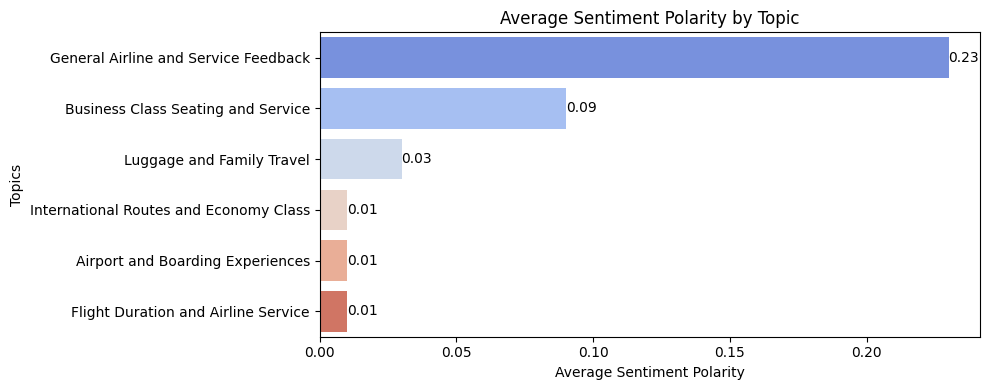

In [ ]:
import numpy as np

# Sort the data by sentiment values in descending order
sorted_idx = np.argsort(topic_sentiment)[::-1]
sorted_topics = np.array(list(topic_labels.values()))[sorted_idx]
sorted_sentiments = np.array(topic_sentiment)[sorted_idx]

# Create a color gradient
cmap = sns.color_palette("coolwarm", len(sorted_sentiments))

# Create a bar chart for average sentiment by topic
plt.figure(figsize=(10, 4))
barplot = sns.barplot(
    y=sorted_topics,
    x=sorted_sentiments,
    hue=sorted_topics,
    palette=cmap,
    dodge=False,  # Ensure all bars are shown in one color per category
    legend=False  # Disable the legend
)

# Add annotations on the bars
for i, v in enumerate(sorted_sentiments):
    barplot.text(v, i, f'{v:.2f}', color='black', va='center')

# Set chart title and labels
plt.title('Average Sentiment Polarity by Topic')
plt.xlabel('Average Sentiment Polarity')
plt.ylabel('Topics')

plt.tight_layout()
plt.show()

In [ ]:
# Create a summary table showing topics and average sentiment
summary = pd.DataFrame({
    'Topic': topic_labels.values(),
    'Average Sentiment': topic_sentiment
})

# Display the summary table
print(summary)

                                                 Topic  Average Sentiment
dominant_topic                                                           
0                  Flight Duration and Airline Service               0.01
1                   Business Class Seating and Service               0.09
2                     Airport and Boarding Experiences               0.01
3                            Luggage and Family Travel               0.03
4               International Routes and Economy Class               0.01
5                 General Airline and Service Feedback               0.23


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


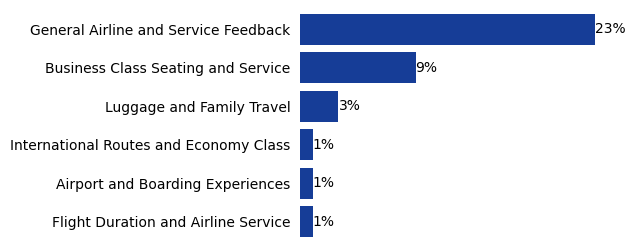

In [ ]:
# Sort the data by sentiment values in descending order
sorted_idx = np.argsort(topic_sentiment)[::-1]
sorted_topics = np.array(list(topic_labels.values()))[sorted_idx]
sorted_sentiments = np.array(topic_sentiment)[sorted_idx]

# Determine the index of the maximum sentiment value
max_idx = np.argmax(sorted_sentiments)

# Set base color and create a darker shade for the highest value
base_color = "#0035AD"  # Example base color (you can choose any color you like)
darker_color = "#0035AD"  # Darker shade of the base color

# Create a list of colors for the bars
bar_colors = [base_color] * len(sorted_sentiments)  # All bars same color
bar_colors[max_idx] = darker_color  # Darker shade for the highest value

# Create a color gradient
cmap = sns.light_palette("blue", as_cmap=False, input='xkcd', reverse=True)

# Create a bar chart for average sentiment by topic
plt.figure(figsize=(4, 3))
barplot = sns.barplot(
    y=sorted_topics,
    x=sorted_sentiments,
    hue=sorted_topics,
    palette=bar_colors,
    dodge=False,  # Ensure all bars are shown in one color per category
    legend=False,  # Disable the legend
    zorder=2
)

# Remove x and y labels
plt.xlabel('')
plt.ylabel('')

# Removing ticks and spines
plt.xticks([])
plt.tick_params(left=False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Add annotations on the bars
for i, v in enumerate(sorted_sentiments):
    barplot.text(v, i, f'{v:.0%}', color='black', va='center')

# Set chart title and labels
#plt.title('What Matters to Passengers?',
          #fontsize=13, fontweight='bold', fontfamily='monospace', transform=plt.gca().transAxes)

# Save the chart
plt.savefig('bar_topics.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews,lemmatized,polarity,subjectivity,dominant_topic
0,British Airways World Traveller Plus (Premium ...,british airway world traveller plus premium ec...,0.234242,0.536970,2
1,BA is barely a step above low cost airlines. T...,ba barely step low cost airline try dime nicke...,0.010000,0.340000,0
3,Horrible service from boarding to landing. ...,horrible service boarding landing flew london ...,-0.583333,0.883333,5
9,Absolutely atrocious. LHR-ORD-LHR Round-trip. ...,absolutely atrocious lhrordlhr roundtrip briti...,-0.069176,0.513684,2
10,As someone who flies relentlessly with British...,someone fly relentlessly british airway busine...,-0.005556,0.492593,0
...,...,...,...,...,...
3860,his was a bmi Regional operated flight on a RJ...,bmi regional operated flight rj145 manchester ...,0.061364,0.363636,3
3861,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger name boa...,0.173214,0.428571,5
3862,My son who had worked for British Airways urge...,son worked british airway urged fly british ai...,0.113542,0.256250,0
3863,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon a318 reall...,0.340000,0.440000,5


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Initialize and fit the CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['lemmatized'])

# Extract topic words for the word cloud
num_topics = lda_model.num_topics
num_words = 20
topic_words = {}

for topic_idx in range(num_topics):
    words = lda_model.get_topic_terms(topic_idx, topn=num_words)
    feature_names = vectorizer.get_feature_names_out()
    words_arr = np.array(words) # Convert words to numpy array
    top_words_idx = words_arr[:,0].astype(int) # Convert the IDs to integers
    topic_words[topic_idx] = ' '.join([feature_names[i] for i in top_words_idx]) # Use the integer IDs to access feature names
    print(f"Topic {topic_idx}: {topic_words[topic_idx]}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: 0289 004 001 0055 140 10272014 1020 0110 1000hrs 0005 1700 15hrs 1245pm 1125th 103 261214 1450 0510 1330 2in
Topic 1: 0710 0289 14a 0103 004 1015 1635 1372 150 101006 1000hrs 101 1100pm 1010 2013 01d 1155pm 0510 10272014 1245pm
Topic 2: 0710 0289 004 101006 01d 1015 1010 0005 0055 001 10272014 116 14a 0510 1020 1125th 0600 14k 0103 140
Topic 3: 0289 0710 004 140 0510 101006 1635 1450 1415 101 103 10in 1010 1700 090815 1245pm 1555 173 1000hrs 4244
Topic 4: critical cried jumpseat crispy everyone manchester cradle established cranky critic 1810 gviio 777300 evian outdone embarking paced contain creature cramming
Topic 5: 0289 150 0710 004 0103 10272014 1015 1000hrs 14a 1155pm 1372 14k 1955 1020 261214 1100pm 0200 11am 101006 290914


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
